# Example notebook for the ATOM pipeline
---------------------------------

Download the Australian weather dataset from kaggle at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.  
  
**Description:** Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow.

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score

# Load the Australian weather dataset
X = pd.read_csv('weatherAUS.csv')
X = X.drop(['RISK_MM', 'Date'], axis=1)  # Drop unrelated features

In [2]:
# Call ATOM using only a percentage of the complete dataset (for explanatory purposes)
atom = ATOMClassifier(X, target="RainTomorrow", percentage=5, log='log', verbose=3, random_state=2)

<<=============== ATOM ===============>>
Initial data cleaning...
 --> Dropping 45 duplicate rows.
Algorithm task: binary classification.

Data stats =====================>
Number of features: 21
Number of instances: 7107
Size of training set: 4974
Size of test set: 2133
Instances per target class:
RainTomorrow --> Count
0: No        --> 5554
1: Yes       --> 1553



In [3]:
# Impute missing values
atom.impute(strat_num='mean', strat_cat='missing', max_frac=0.8)

Handling missing values...
 --> Imputing 18 values with mean in feature MinTemp.
 --> Imputing 8 values with mean in feature MaxTemp.
 --> Imputing 49 values with mean in feature Rainfall.
 --> Imputing 2175 values with mean in feature Evaporation.
 --> Imputing 2416 values with mean in feature Sunshine.
 --> Imputing 282 values with missing in feature WindGustDir.
 --> Imputing 278 values with mean in feature WindGustSpeed.
 --> Imputing 338 values with missing in feature WindDir9am.
 --> Imputing 117 values with missing in feature WindDir3pm.
 --> Imputing 40 values with mean in feature WindSpeed9am.
 --> Imputing 80 values with mean in feature WindSpeed3pm.
 --> Imputing 62 values with mean in feature Humidity9am.
 --> Imputing 137 values with mean in feature Humidity3pm.
 --> Imputing 465 values with mean in feature Pressure9am.
 --> Imputing 466 values with mean in feature Pressure3pm.
 --> Imputing 1920 values with mean in feature Cloud9am.
 --> Imputing 1979 values with mean in 

In [4]:
# Encode the categorical features
atom.encode(max_onehot=10, fraction_to_other=0.01)

Encoding categorical features...
 --> Target-encoding feature Location. Contains 49 unique categories.
 --> Target-encoding feature WindGustDir. Contains 17 unique categories.
 --> Target-encoding feature WindDir9am. Contains 17 unique categories.
 --> Target-encoding feature WindDir3pm. Contains 17 unique categories.
 --> One-hot-encoding feature RainToday. Contains 3 unique categories.


In [5]:
# Select only the best 10 features
atom.feature_selection(strategy="univariate", solver='f_classif', max_features=15, max_correlation=0.8)

# See which features were removed due to collinearity
atom.collinear

Performing feature selection...
 --> Feature Pressure3pm was removed due to collinearity with another feature.
 --> Feature Temp9am was removed due to collinearity with another feature.
 --> Feature Temp3pm was removed due to collinearity with another feature.
 --> Feature RainToday_Yes was removed due to collinearity with another feature.
 --> Feature MinTemp was removed after the univariate test (score: 54.40  p-value: 0.00).
 --> Feature Evaporation was removed after the univariate test (score: 63.07  p-value: 0.00).
 --> Feature WindGustDir was removed after the univariate test (score: 123.52  p-value: 0.00).
 --> Feature WindDir3pm was removed after the univariate test (score: 112.96  p-value: 0.00).
 --> Feature WindSpeed9am was removed after the univariate test (score: 63.29  p-value: 0.00).
 --> Feature WindSpeed3pm was removed after the univariate test (score: 47.38  p-value: 0.00).
 --> Feature Temp9am was removed after the univariate test (score: 0.79  p-value: 0.38).
 --> F

,drop_feature,correlated_feature,correlation_value
0,Pressure3pm,Pressure9am,0.95952
1,Temp9am,"MinTemp, MaxTemp","0.8999, 0.87906"
2,Temp3pm,"MaxTemp, Temp9am","0.96302, 0.84204"
3,RainToday_Yes,RainToday_No,-0.97249


In [6]:
# Perform undersampling of the majority class to balance the dataset
atom.balance(undersample=0.8)

Using TensorFlow backend.


Performing undersampling...
 --> Removing 2522 rows from majority class.


In [7]:
# Remove outliers from the training set
atom.outliers(max_sigma=5)

Handling outliers...
 --> Dropping 24 rows due to outliers.


In [8]:
# Change the verbosity of ATOM to not print too much details while fitting
atom.verbose = 1

# Fit using successive halving on tree-based models
atom.fit(['tree', 'bag', 'et', 'rf', 'adab', 'gbm', 'lgb', 'catb'],
        successive_halving=True,
        metric=accuracy_score,
        max_iter=5,
        init_points=1,
        cv=1,
        bagging=5)


Running pipeline =================>


Processing:   0%|                                                                                | 0/8 [00:00<?, ?it/s]

Metric: accuracy_score


<<================ Iteration 0 ================>>
Models in pipeline: Tree, Bag, ET, RF, AdaB, GBM, LGB, CatB


Processing:   0%|                                                                                | 0/4 [00:00<?, ?it/s]



Final results ================>>
Duration: 00h:00m:55s
Metric: accuracy_score
--------------------------------
Decision Tree             --> 0.704 ± 0.040
Bagging                   --> 0.759 ± 0.014 !!
Extra-Trees               --> 0.749 ± 0.010
Random Forest             --> 0.758 ± 0.010
AdaBoost                  --> 0.730 ± 0.025
Gradient Boosting Machine --> 0.744 ± 0.011
LightGBM                  --> 0.724 ± 0.020
CatBoost                  --> 0.723 ± 0.011


<<================ Iteration 1 ================>>
Models in pipeline: Bag, ET, RF, GBM


Processing:   0%|                                                                                | 0/2 [00:00<?, ?it/s]



Final results ================>>
Duration: 00h:01m:27s
Metric: accuracy_score
--------------------------------
Bagging                   --> 0.751 ± 0.008
Extra-Trees               --> 0.758 ± 0.014
Random Forest             --> 0.766 ± 0.012
Gradient Boosting Machine --> 0.775 ± 0.014 !!


<<================ Iteration 2 ================>>
Models in pipeline: RF, GBM


Processing:   0%|                                                                                | 0/1 [00:00<?, ?it/s]



Final results ================>>
Duration: 00h:02m:12s
Metric: accuracy_score
--------------------------------
Random Forest             --> 0.798 ± 0.007
Gradient Boosting Machine --> 0.801 ± 0.004 !!


<<================ Iteration 3 ================>>
Model in pipeline: GBM


Processing: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [01:02<00:00, 62.66s/it]



Final results ================>>
Duration: 00h:03m:15s
Metric: accuracy_score
--------------------------------
Gradient Boosting Machine --> 0.796 ± 0.001


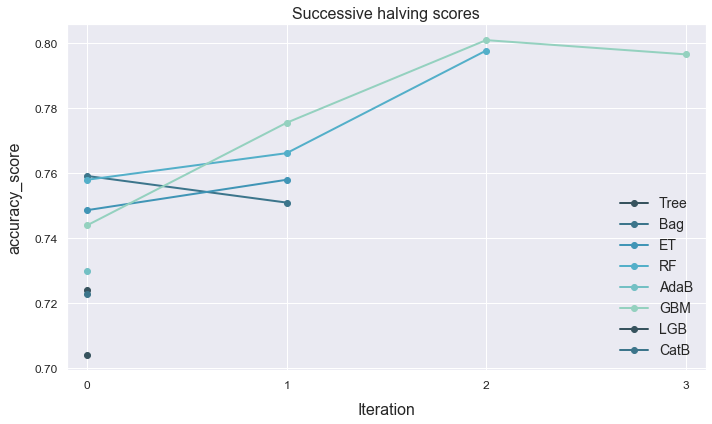

In [9]:
atom.plot_successive_halving()

In [10]:
# Check scores of the first iteration
atom.results[0]

,model,accuracy_score,time,bagging_mean,bagging_std,bagging_time
0,Tree,0.783626,2.75s,0.704094,0.039938,0.02s
1,Bag,0.771930,6.87s,0.759064,0.013539,6.22s
2,ET,0.719298,3.38s,0.748538,0.010461,0.45s
3,RF,0.766082,8.69s,0.757895,0.009502,7.1s
4,AdaB,0.730994,4.6s,0.729825,0.024921,0.63s
5,GBM,0.766082,3.49s,0.743860,0.011340,0.67s
6,LGB,0.754386,3.06s,0.723977,0.020054,0.22s
7,CatB,0.748538,4.71s,0.722807,0.010846,1.65s


### CatBoost proved to be the best. Let's have a look at the model!

In [18]:
# Check the winner out
print('Best score: ', atom.GBM.score)
atom.GBM.best_model

Best score:  0.8108108108108109


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.01,
                           loss='deviance', max_depth=5, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=17,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=500, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=0.7,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

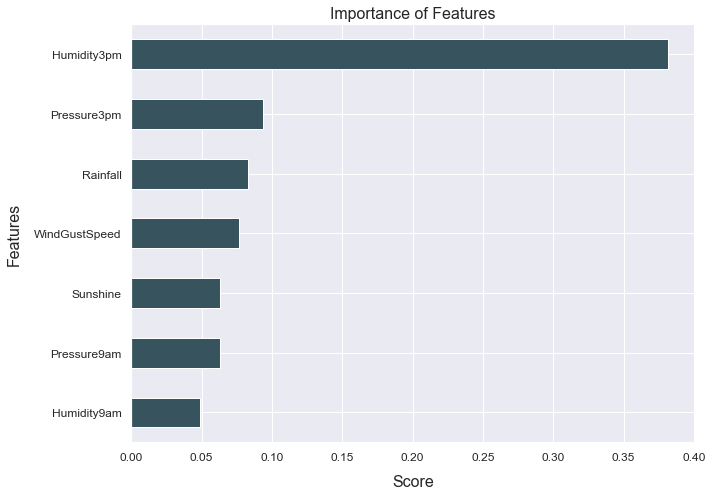

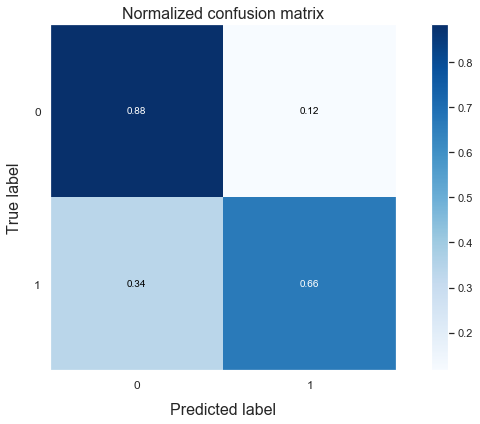

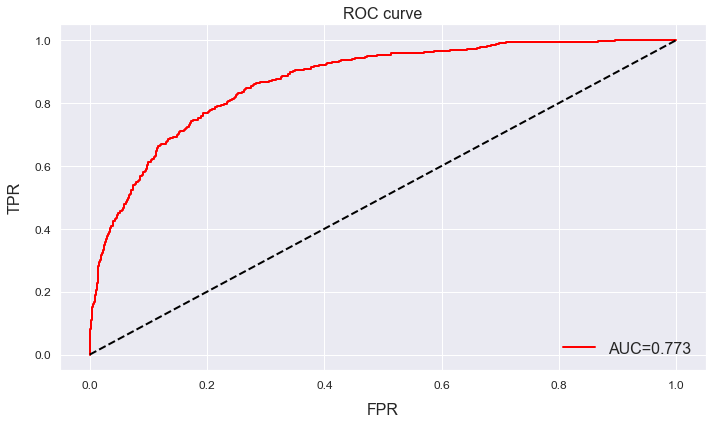

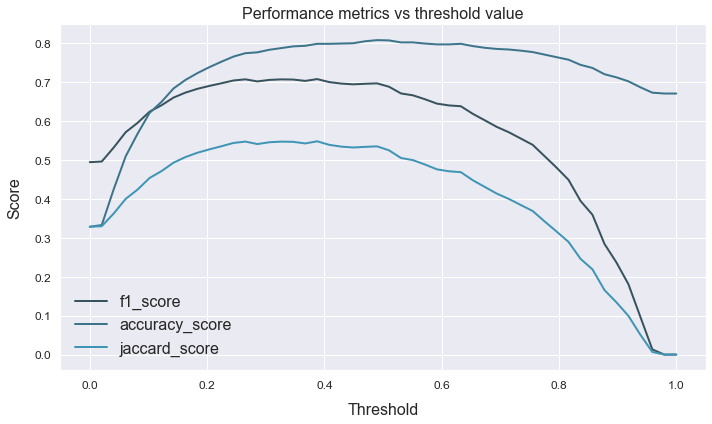

In [19]:
# Make some plots to analyze the results
atom.gbm.plot_feature_importance(show=7, figsize=(10,7))
atom.gbm.plot_confusion_matrix(filename='lgb_cm.png')
atom.gbm.plot_ROC()
atom.gbm.plot_threshold(metric=[f1_score, accuracy_score, jaccard_score], steps=50)